In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from plotnine import *

In [ ]:
movie_df = pd.read_csv("/content/drive/MyDrive/movie_metadata.csv")

In [ ]:
movie_df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
movie_df.shape

(5043, 28)

In [ ]:
movie_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

# Categorical and Numeric Columns :

## Categorical Column
Color        
Director name      
actor name      
genres      
movie_title      
language     
country       
content_rating.    

## Numerical Columns
num_critic_for_reviews       
duration     
director_facebook_likes     
actor_3_facebook_likes     
actor_1_facebook_likes     
gross     
num_voted_users    
cast_total_facebook_likes     
facenumber_in_poster    
num_user_for_reviews      
budget     
title_year    
actor_2_facebook_likes    
imdb_score   
aspect_ratio     
movie_facebook_likes   

In [ ]:
movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [ ]:
#Removing the color section as most of the movies is colored
movie_df["color"].value_counts()
movie_df.drop('color',axis=1,inplace=True)

In [ ]:
#Checking for the columns present in the datset
movie_df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
#Checking for the missing values in the dataset
movie_df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [ ]:
#No of the missing values in the dataset
movie_df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
# We can remove the null values from the dataset where the count is less . so that we don't loose much data
movie_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [ ]:
movie_df.shape

(4737, 27)

## We lost only 6% of the data which is acceptable

In [ ]:
#Replacing the content rating with Value R as it has highest frequency
movie_df["content_rating"].fillna("R", inplace = True)

In [ ]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed
movie_df["aspect_ratio"].fillna(movie_df["aspect_ratio"].median(),inplace=True)

In [ ]:
#We need to replace the value in budget with the median of the value
movie_df["budget"].fillna(movie_df["budget"].median(),inplace=True)

In [ ]:
# We need to replace the value in gross with the median of the value
movie_df['gross'].fillna(movie_df['gross'].median(),inplace=True)

In [ ]:
# Recheck that all the null values are removed
movie_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
#Removing the duplicate values in the datset
movie_df.drop_duplicates(inplace=True)
movie_df.shape

(4695, 27)

In [ ]:
#Count of the language values
movie_df["language"].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Swedish          4
Dutch            4
Thai             3
Arabic           3
Dari             2
Aboriginal       2
Indonesian       2
None             2
Zulu             2
Czech            1
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Maya             1
Filipino         1
Icelandic        1
Kazakh           1
Hungarian        1
Bosnian          1
Telugu           1
Aramaic          1
Mongolian        1
Greek            1
Name: language, dtype: int64

## 94 % of the movie is english

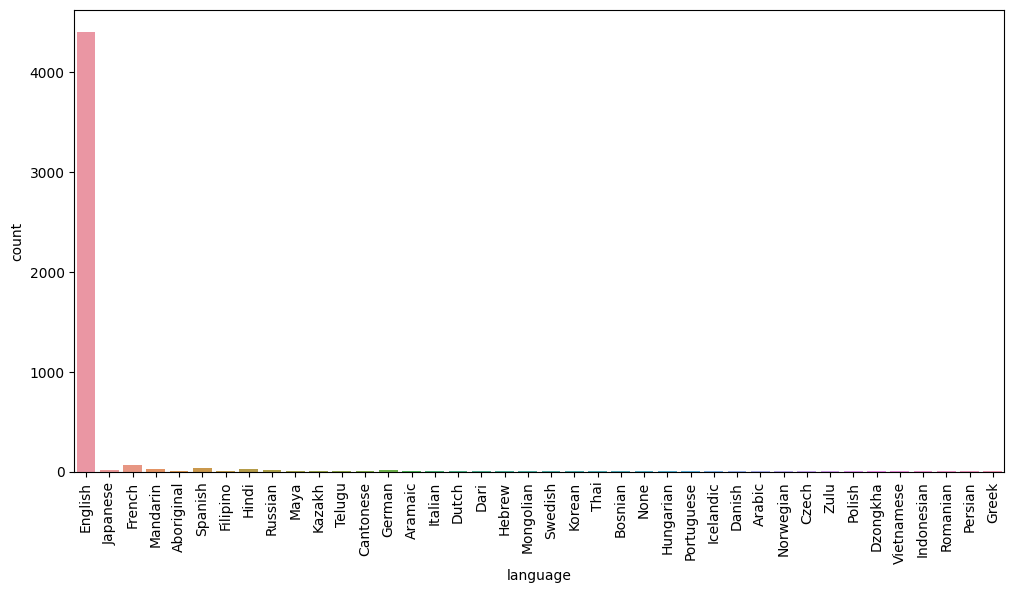

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named 'movie_df'
plt.figure(figsize=(12, 6))  # You can adjust the figure size as needed

# Count plot for the "language" column
sns.countplot(data=movie_df, x="language")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
#Most of the values for the languages is english we can drop the english column
movie_df.drop('language',axis=1,inplace=True)

#Creating a new column to check the net profit made by the company (Gross-Budget)
movie_df["Profit"]=movie_df['budget'].sub(movie_df['gross'], axis = 0)
movie_df.head(5)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [ ]:
#Creating a new column to check the profit percentage made by the company
movie_df['Profit_Percentage']=(movie_df["Profit"]/movie_df["gross"])*100
movie_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,...,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,-63071.0,-90.010133
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,-2033920.0,-99.657017
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,4416.0,96.335079
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26005908.0,Comedy|Drama,Eric Mabius,...,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84,-6005908.0,-23.094398


## So we have added two new columns profit and profit percentage made by the movies


In [ ]:
#Value counts for the countries
value_counts=movie_df["country"].value_counts()
print(value_counts)

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New Line   

## We can see most of the movies are from USA ,UK and the rest of the countries


In [ ]:
##get top 2 values of index
vals = value_counts[:2].index
print (vals)
movie_df['country'] = movie_df.country.where(movie_df.country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object')


In [ ]:
#Successfully divided the country into three catogories
movie_df["country"].value_counts()

USA      3568
other     707
UK        420
Name: country, dtype: int64

In [ ]:
movie_df.head(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585


# Data Visualization

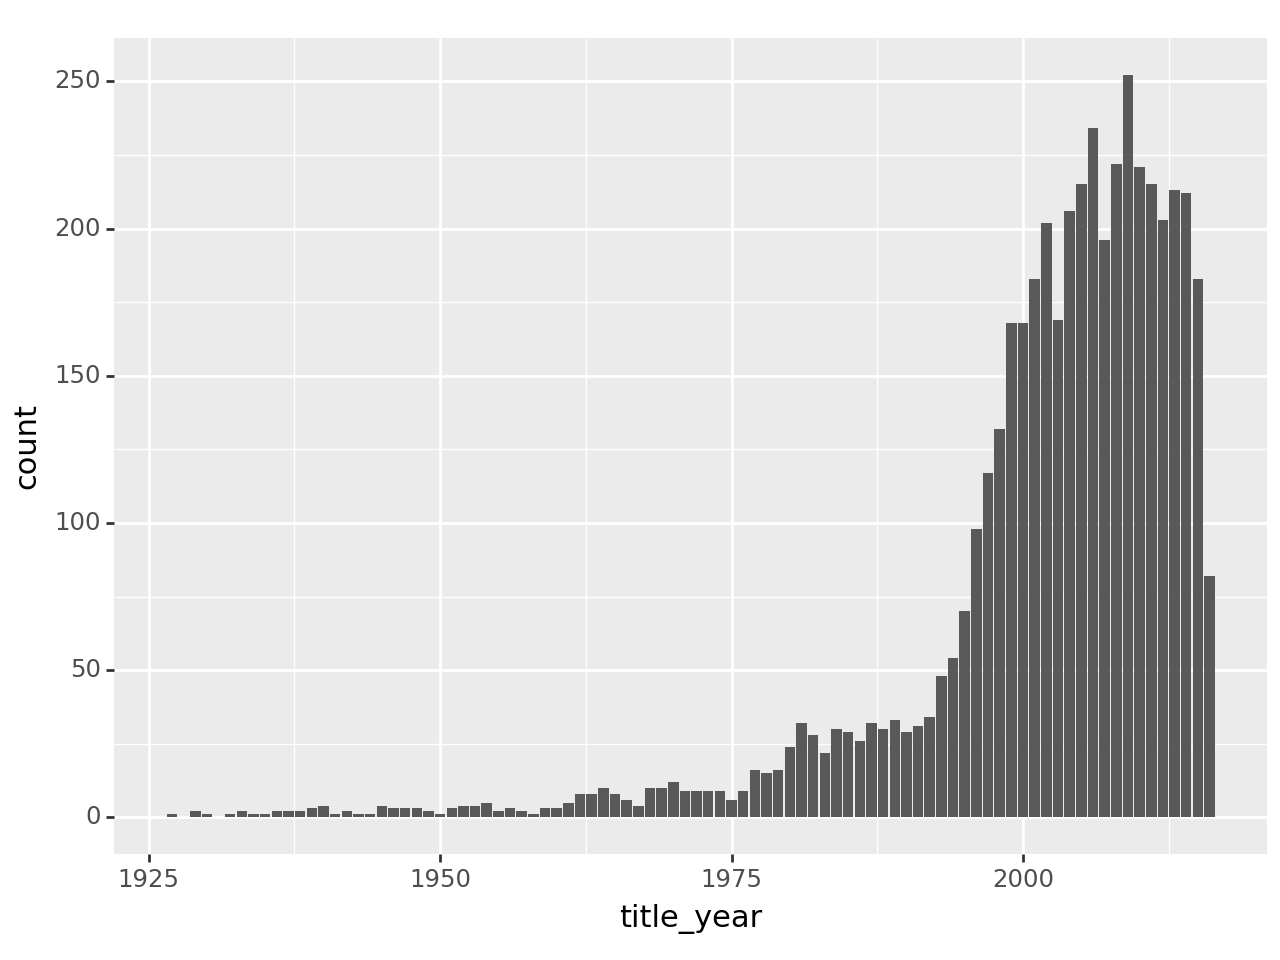

<Figure Size: (640 x 480)>

In [ ]:
#Checking for the movies released year wise
(ggplot(movie_df)         # defining what data to use
 + aes(x='title_year')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

## We can see the most of the movies which are released after 1980

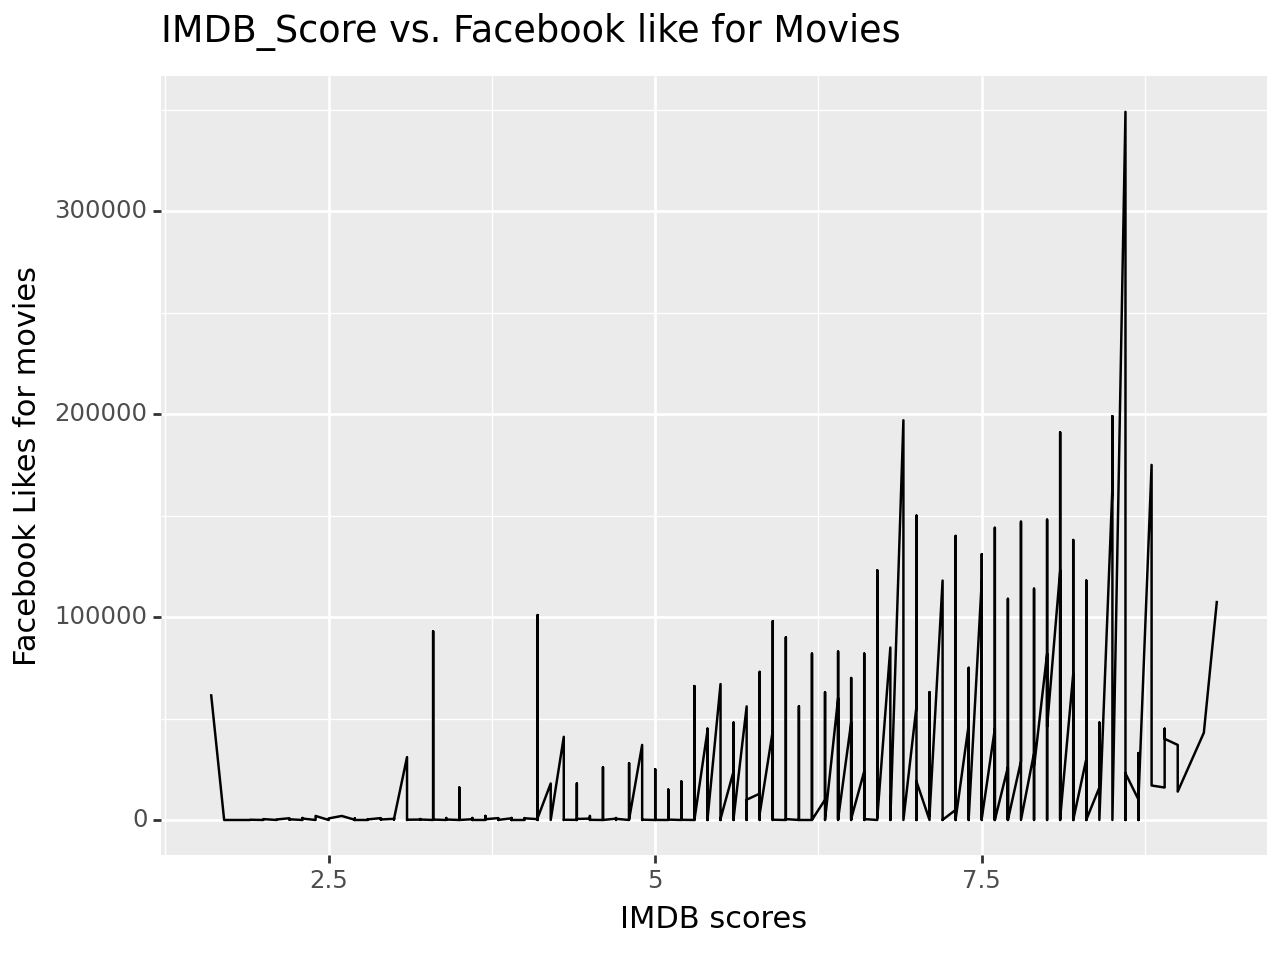

<Figure Size: (640 x 480)>

In [ ]:
#Finding the corelation between imdb_rating with respect to no of facebook likes
(ggplot(movie_df)
 + aes(x='imdb_score', y='movie_facebook_likes')
 + geom_line()
 + labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for movies')
)

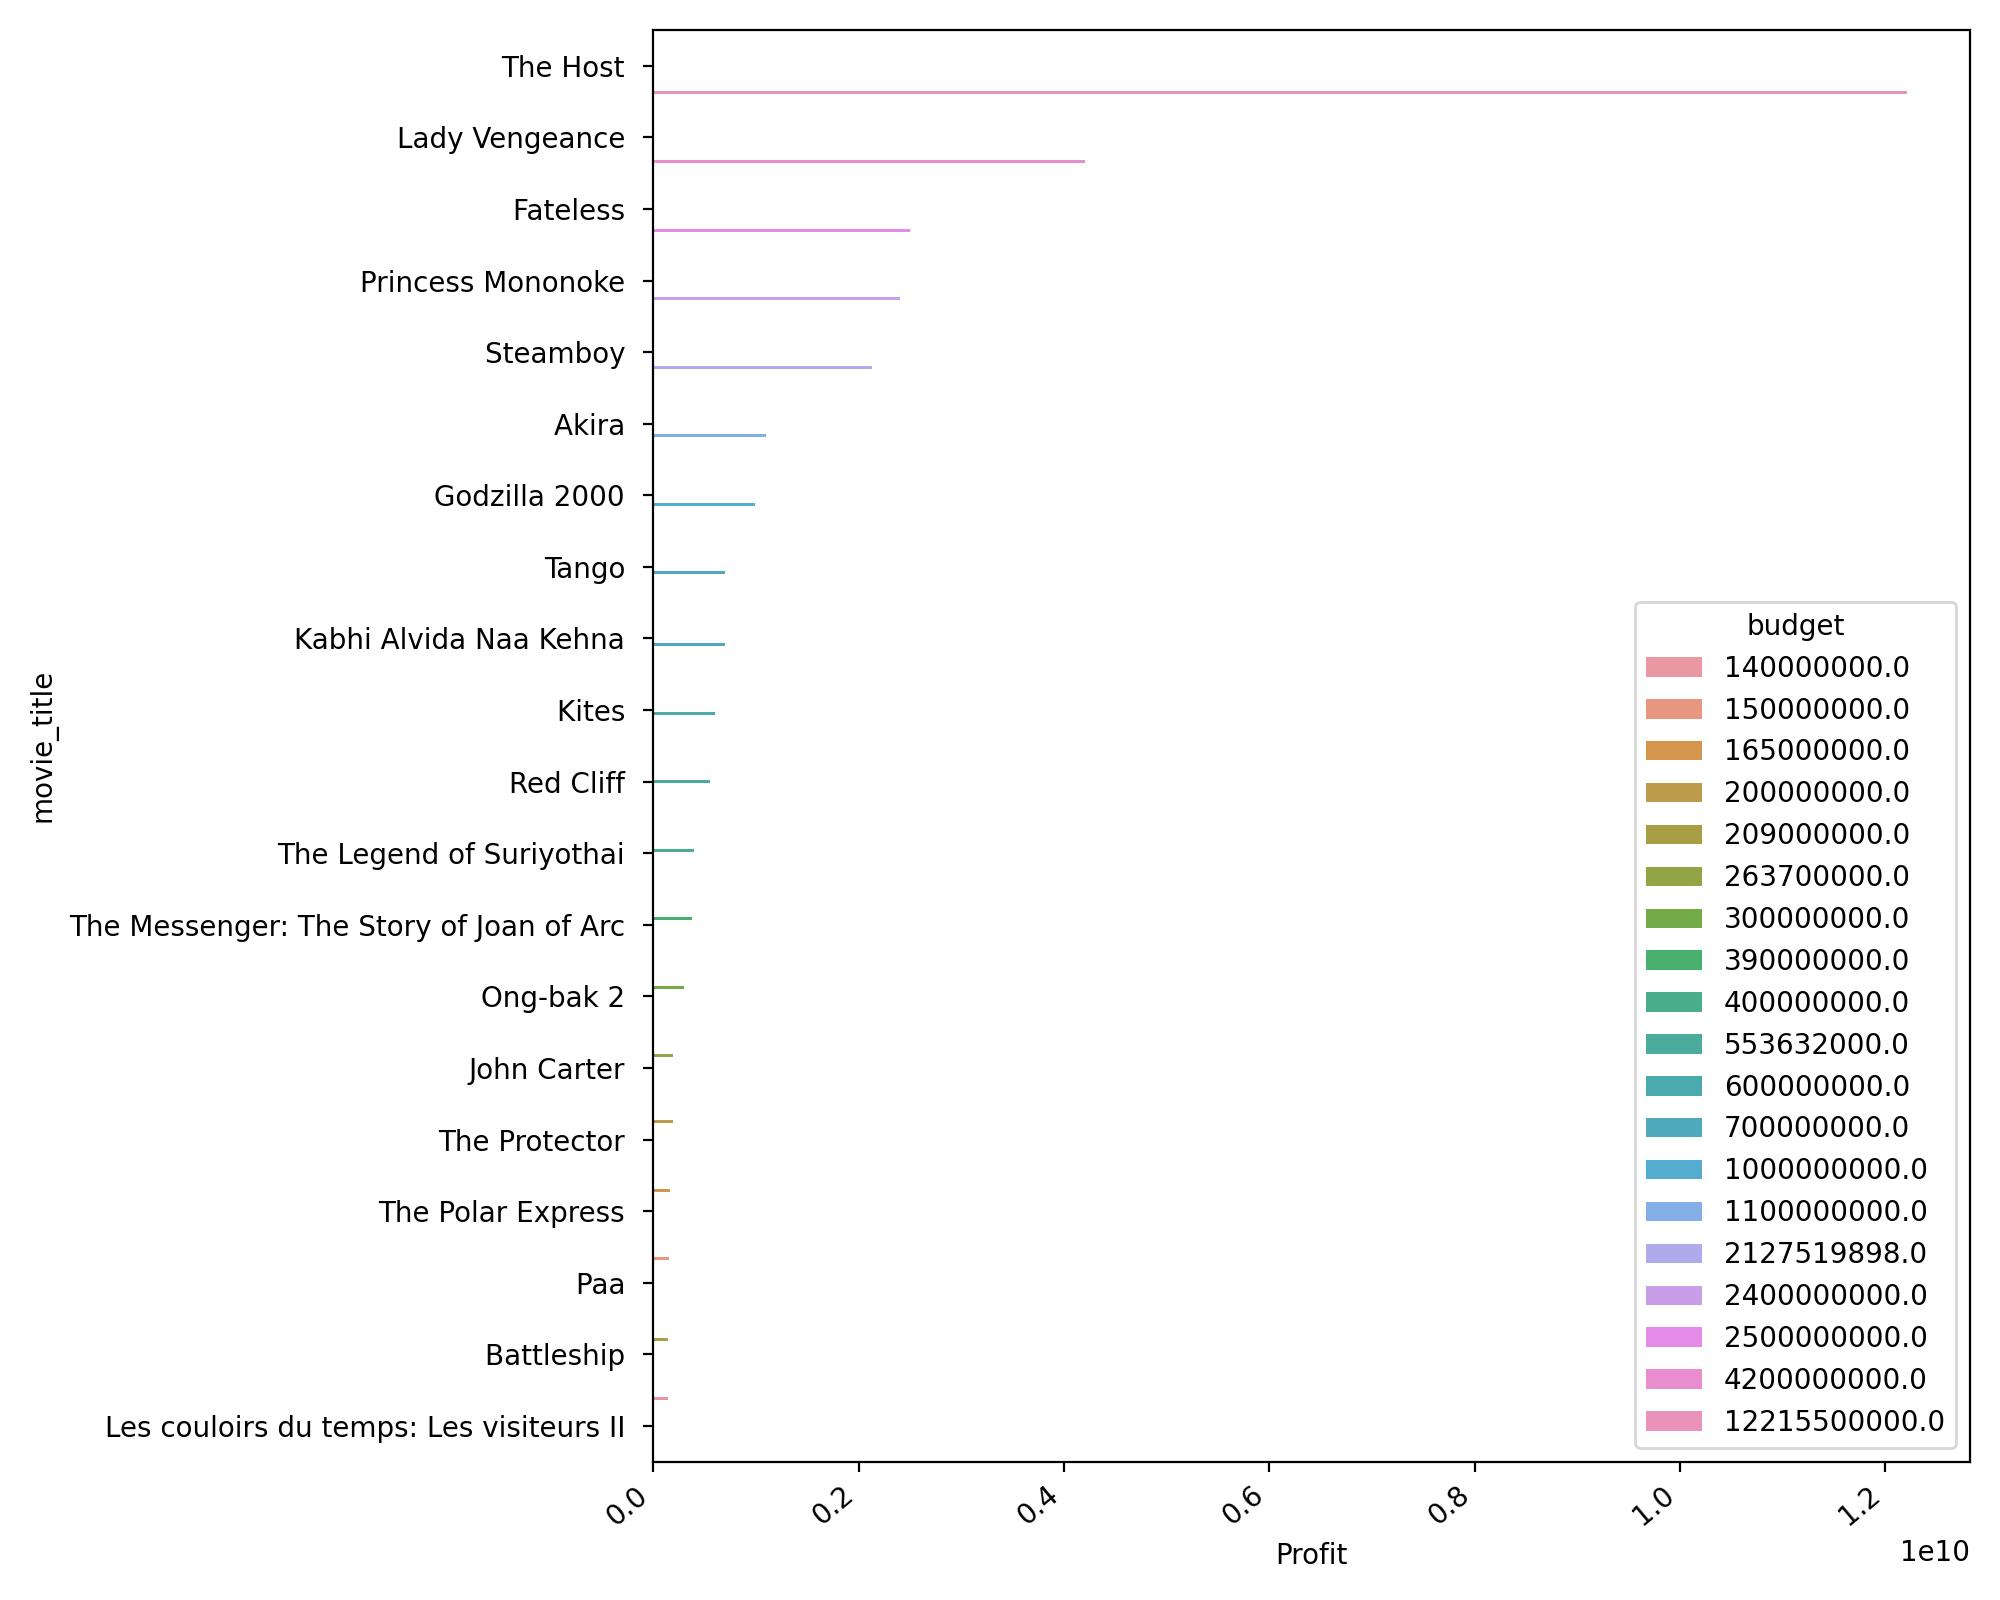

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by profit in descending order
movie_df = movie_df.sort_values(by='Profit', ascending=False)

# Select the top 20 movies
top_20_movies = movie_df.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Profit', y='movie_title', data=top_20_movies, hue='budget')
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()

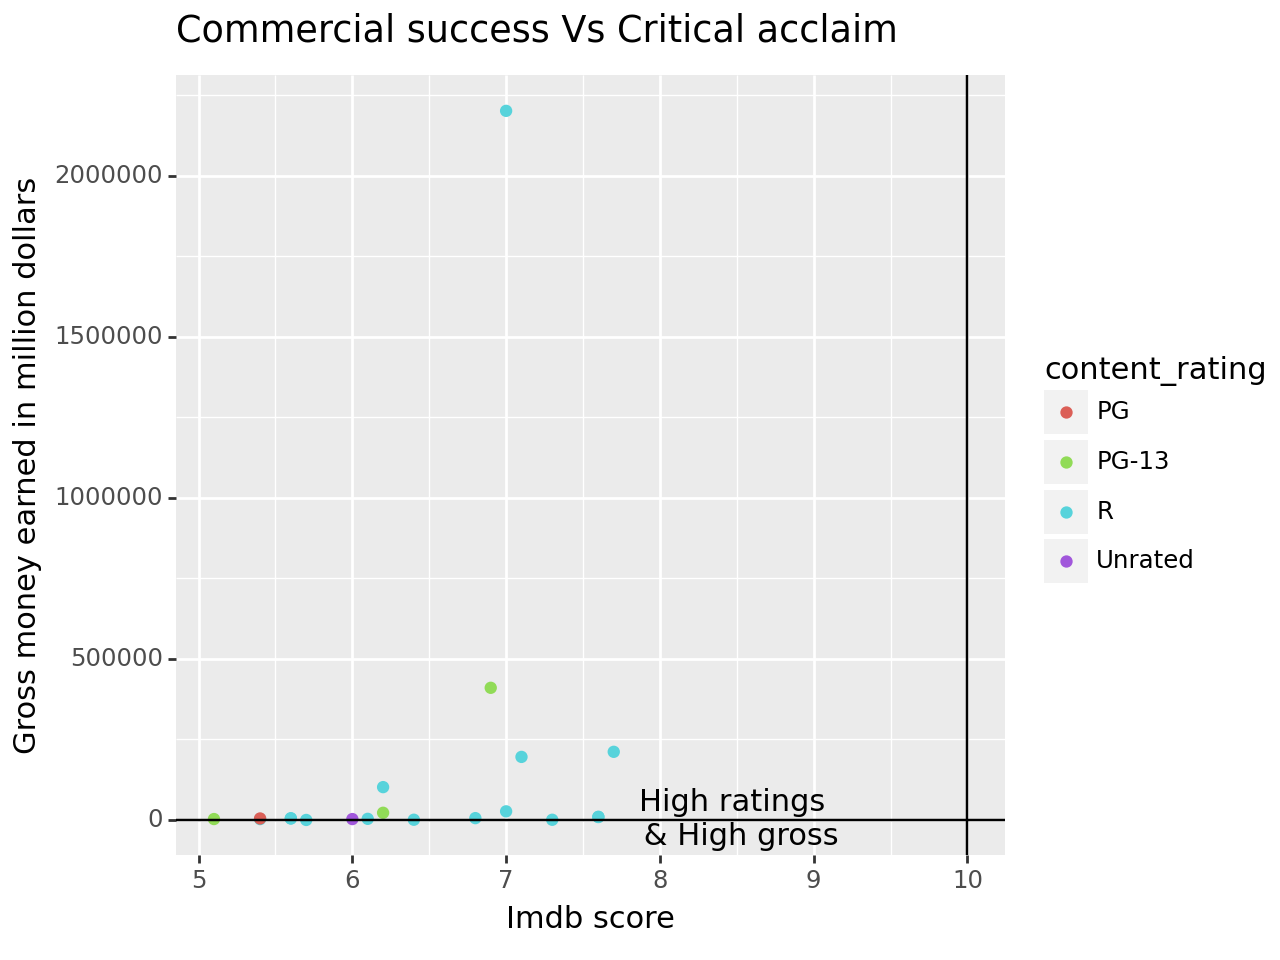

<Figure Size: (640 x 480)>

In [ ]:
#Commercial success vs critial acclaim
movie_df= movie_df.sort_values(by ='Profit_Percentage' , ascending=False)
movie_df_new=movie_df.head(20)
(ggplot(movie_df_new)
 + aes(x='imdb_score', y='gross',color = "content_rating")
 + geom_point()
 +  geom_hline(aes(yintercept = 600)) +
  geom_vline(aes(xintercept = 10)) +
  xlab("Imdb score") +
  ylab("Gross money earned in million dollars") +
  ggtitle("Commercial success Vs Critical acclaim") +
  annotate("text", x = 8.5, y = 700, label = "High ratings \n & High gross"))

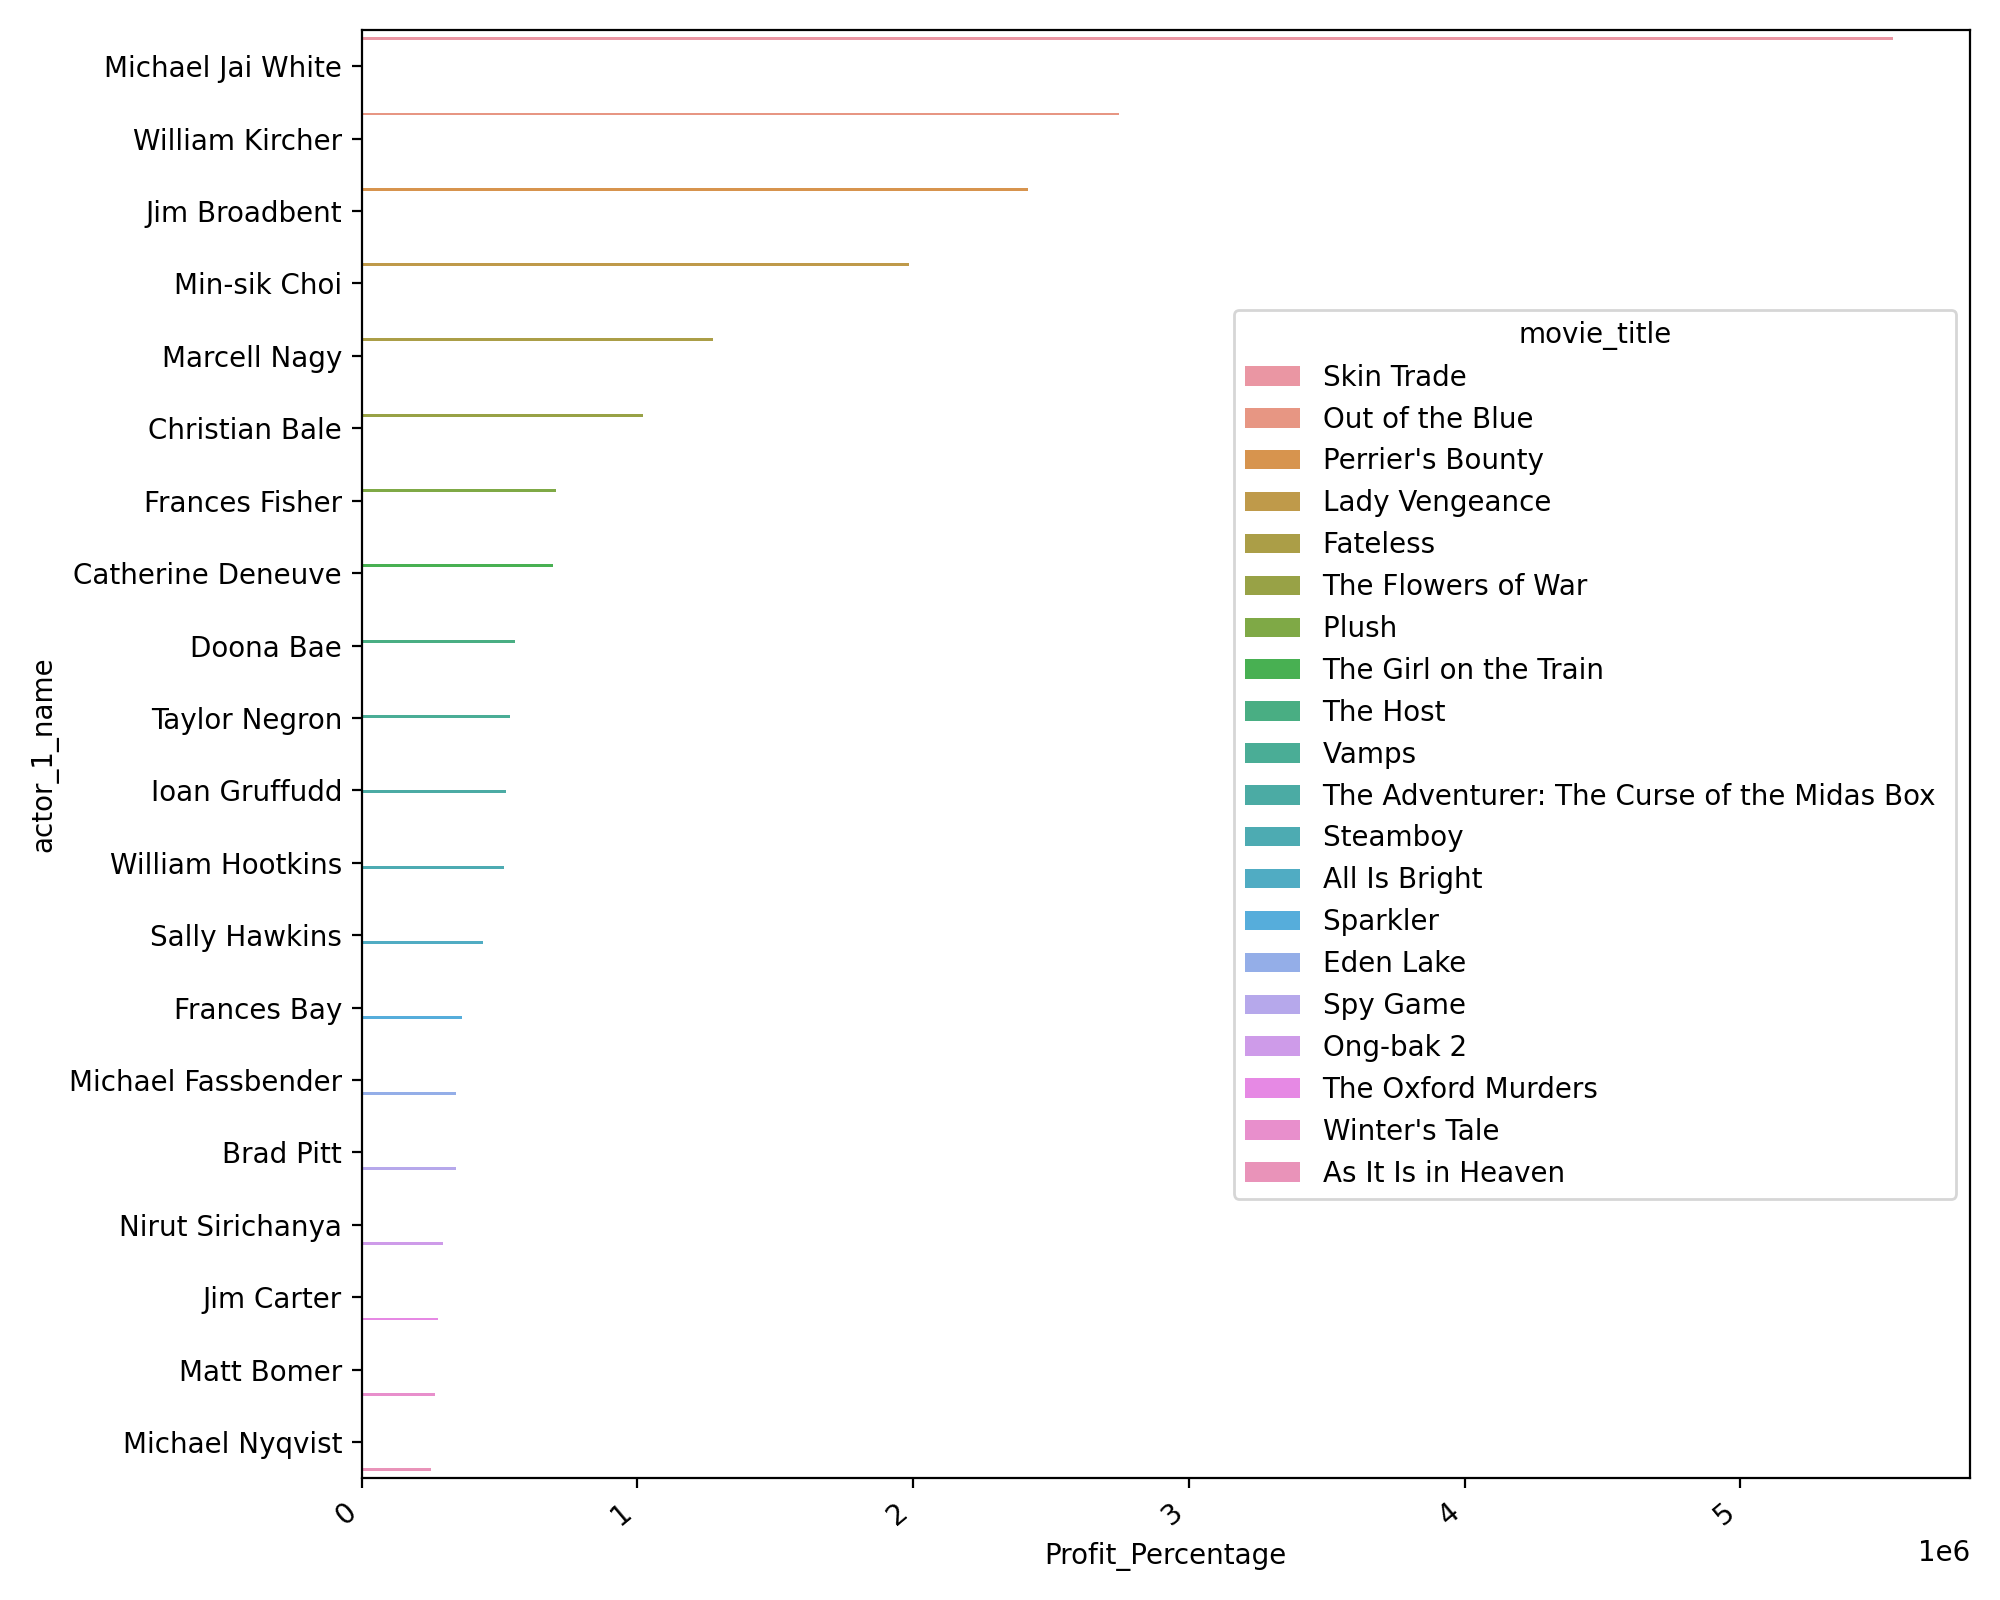

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by Profit_Percentage in descending order
movie_df = movie_df.sort_values(by='Profit_Percentage', ascending=False)

# Select the top 20 actors
top_20_actors = movie_df.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Profit_Percentage', y='actor_1_name', data=top_20_actors, hue='movie_title')
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()


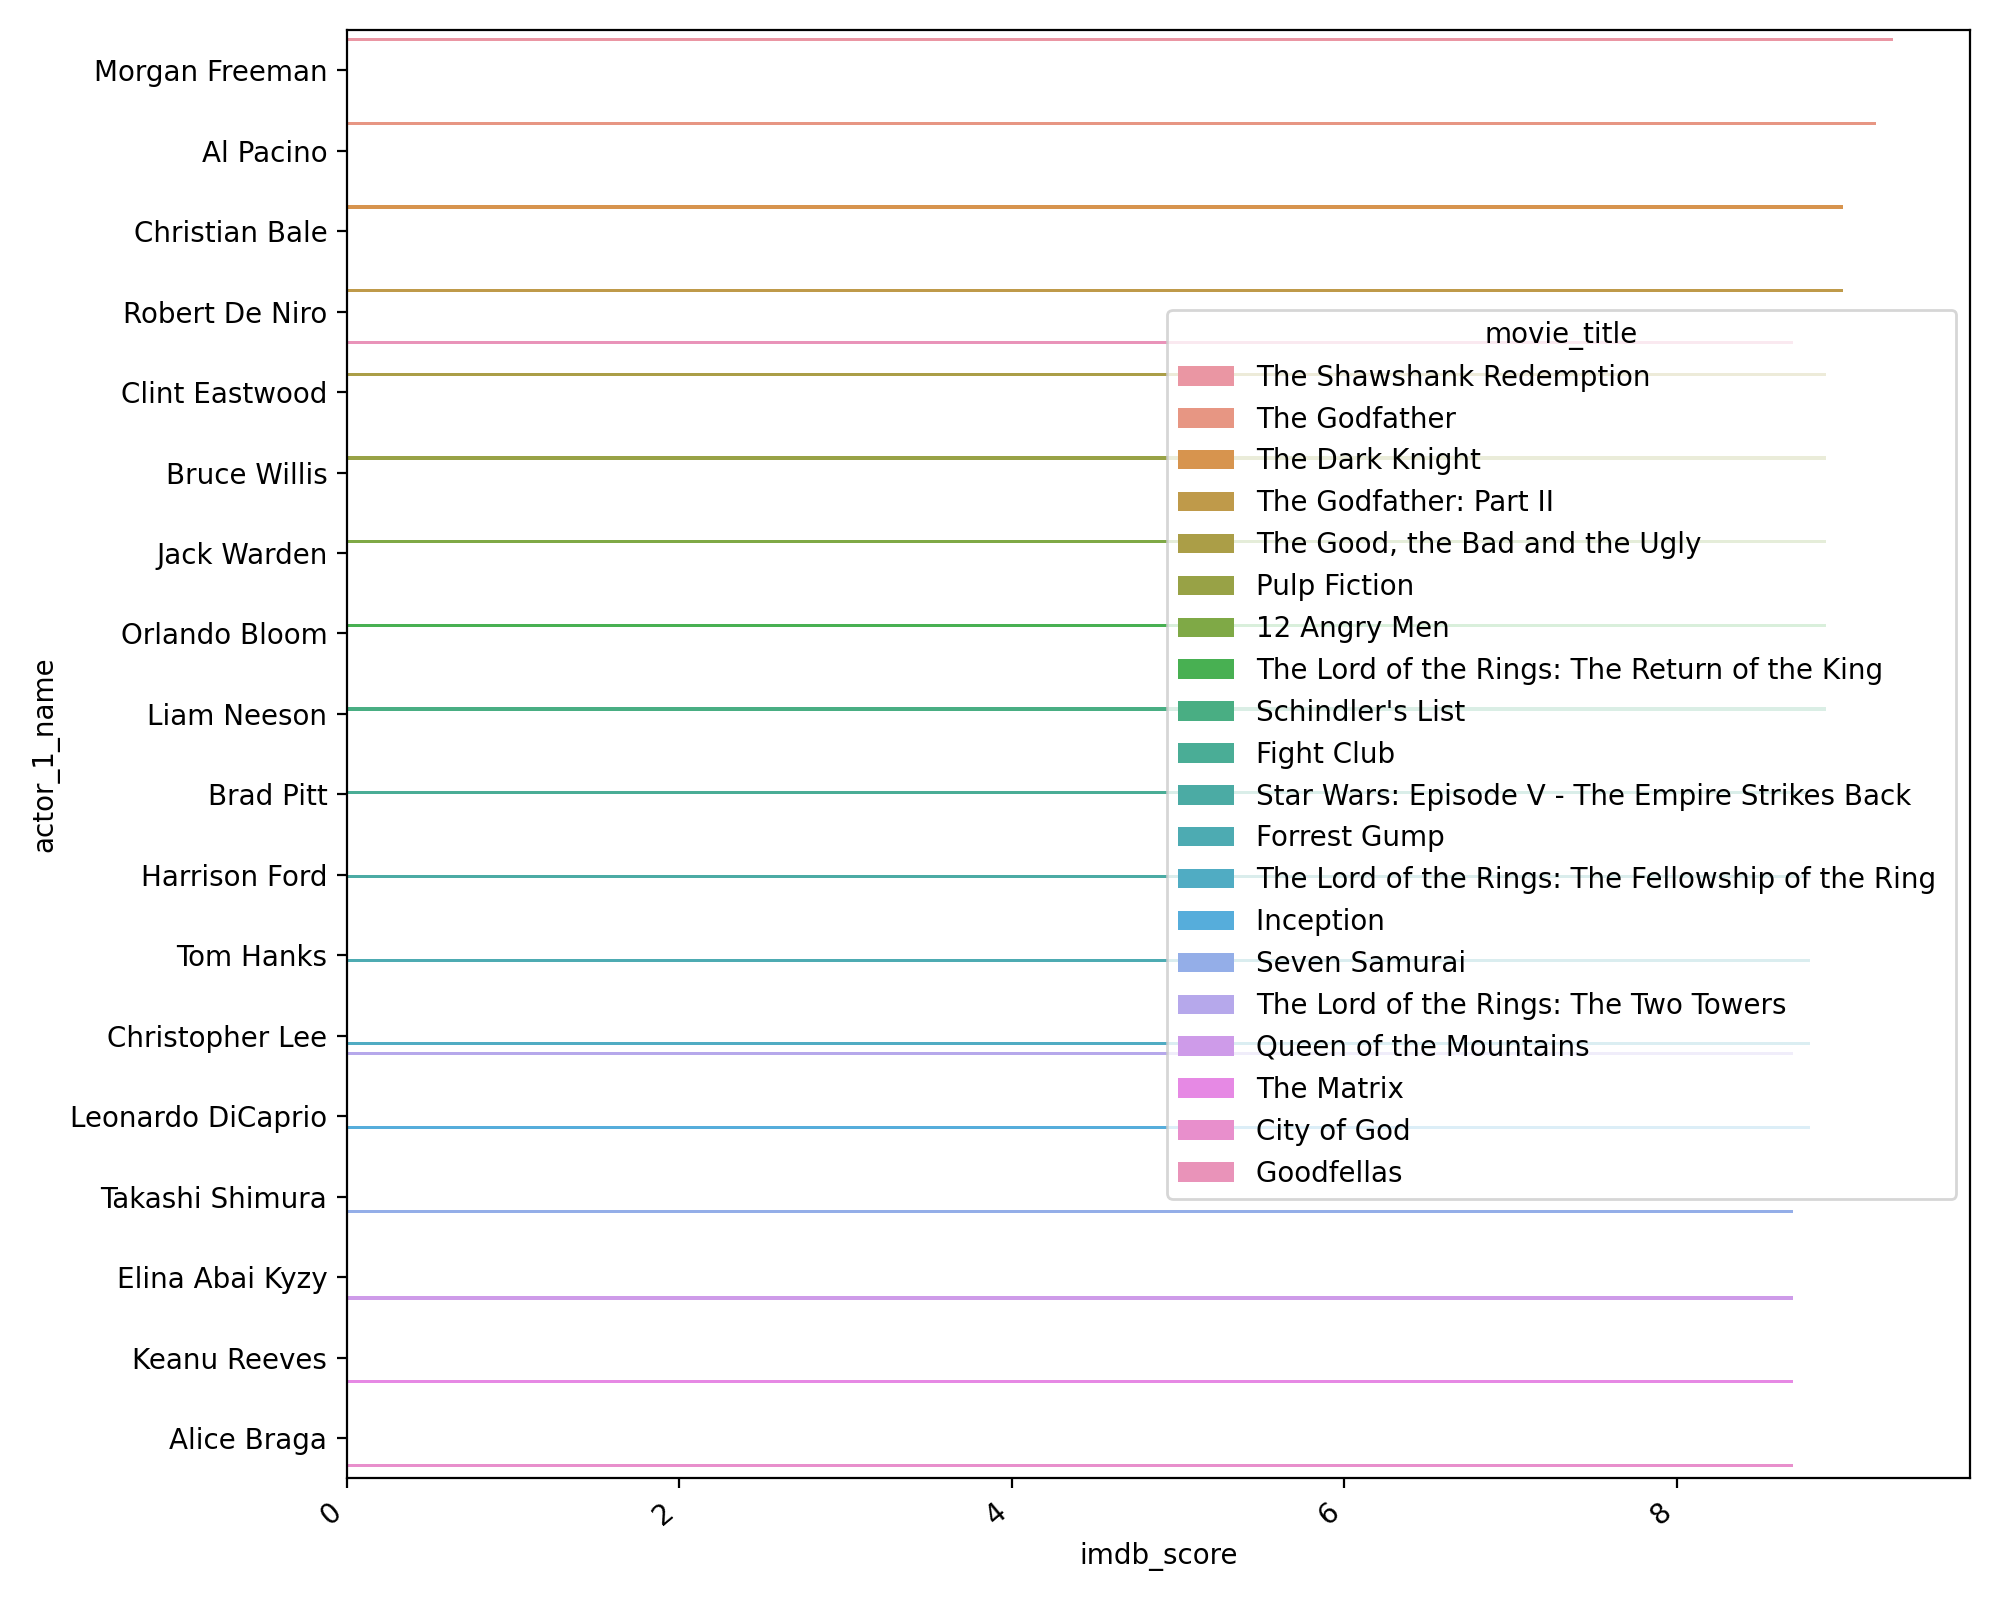

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by imdb_score in descending order
movie_df = movie_df.sort_values(by='imdb_score', ascending=False)

# Select the top 20 actors
top_20_actors = movie_df.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='imdb_score', y='actor_1_name', data=top_20_actors, hue='movie_title')
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()


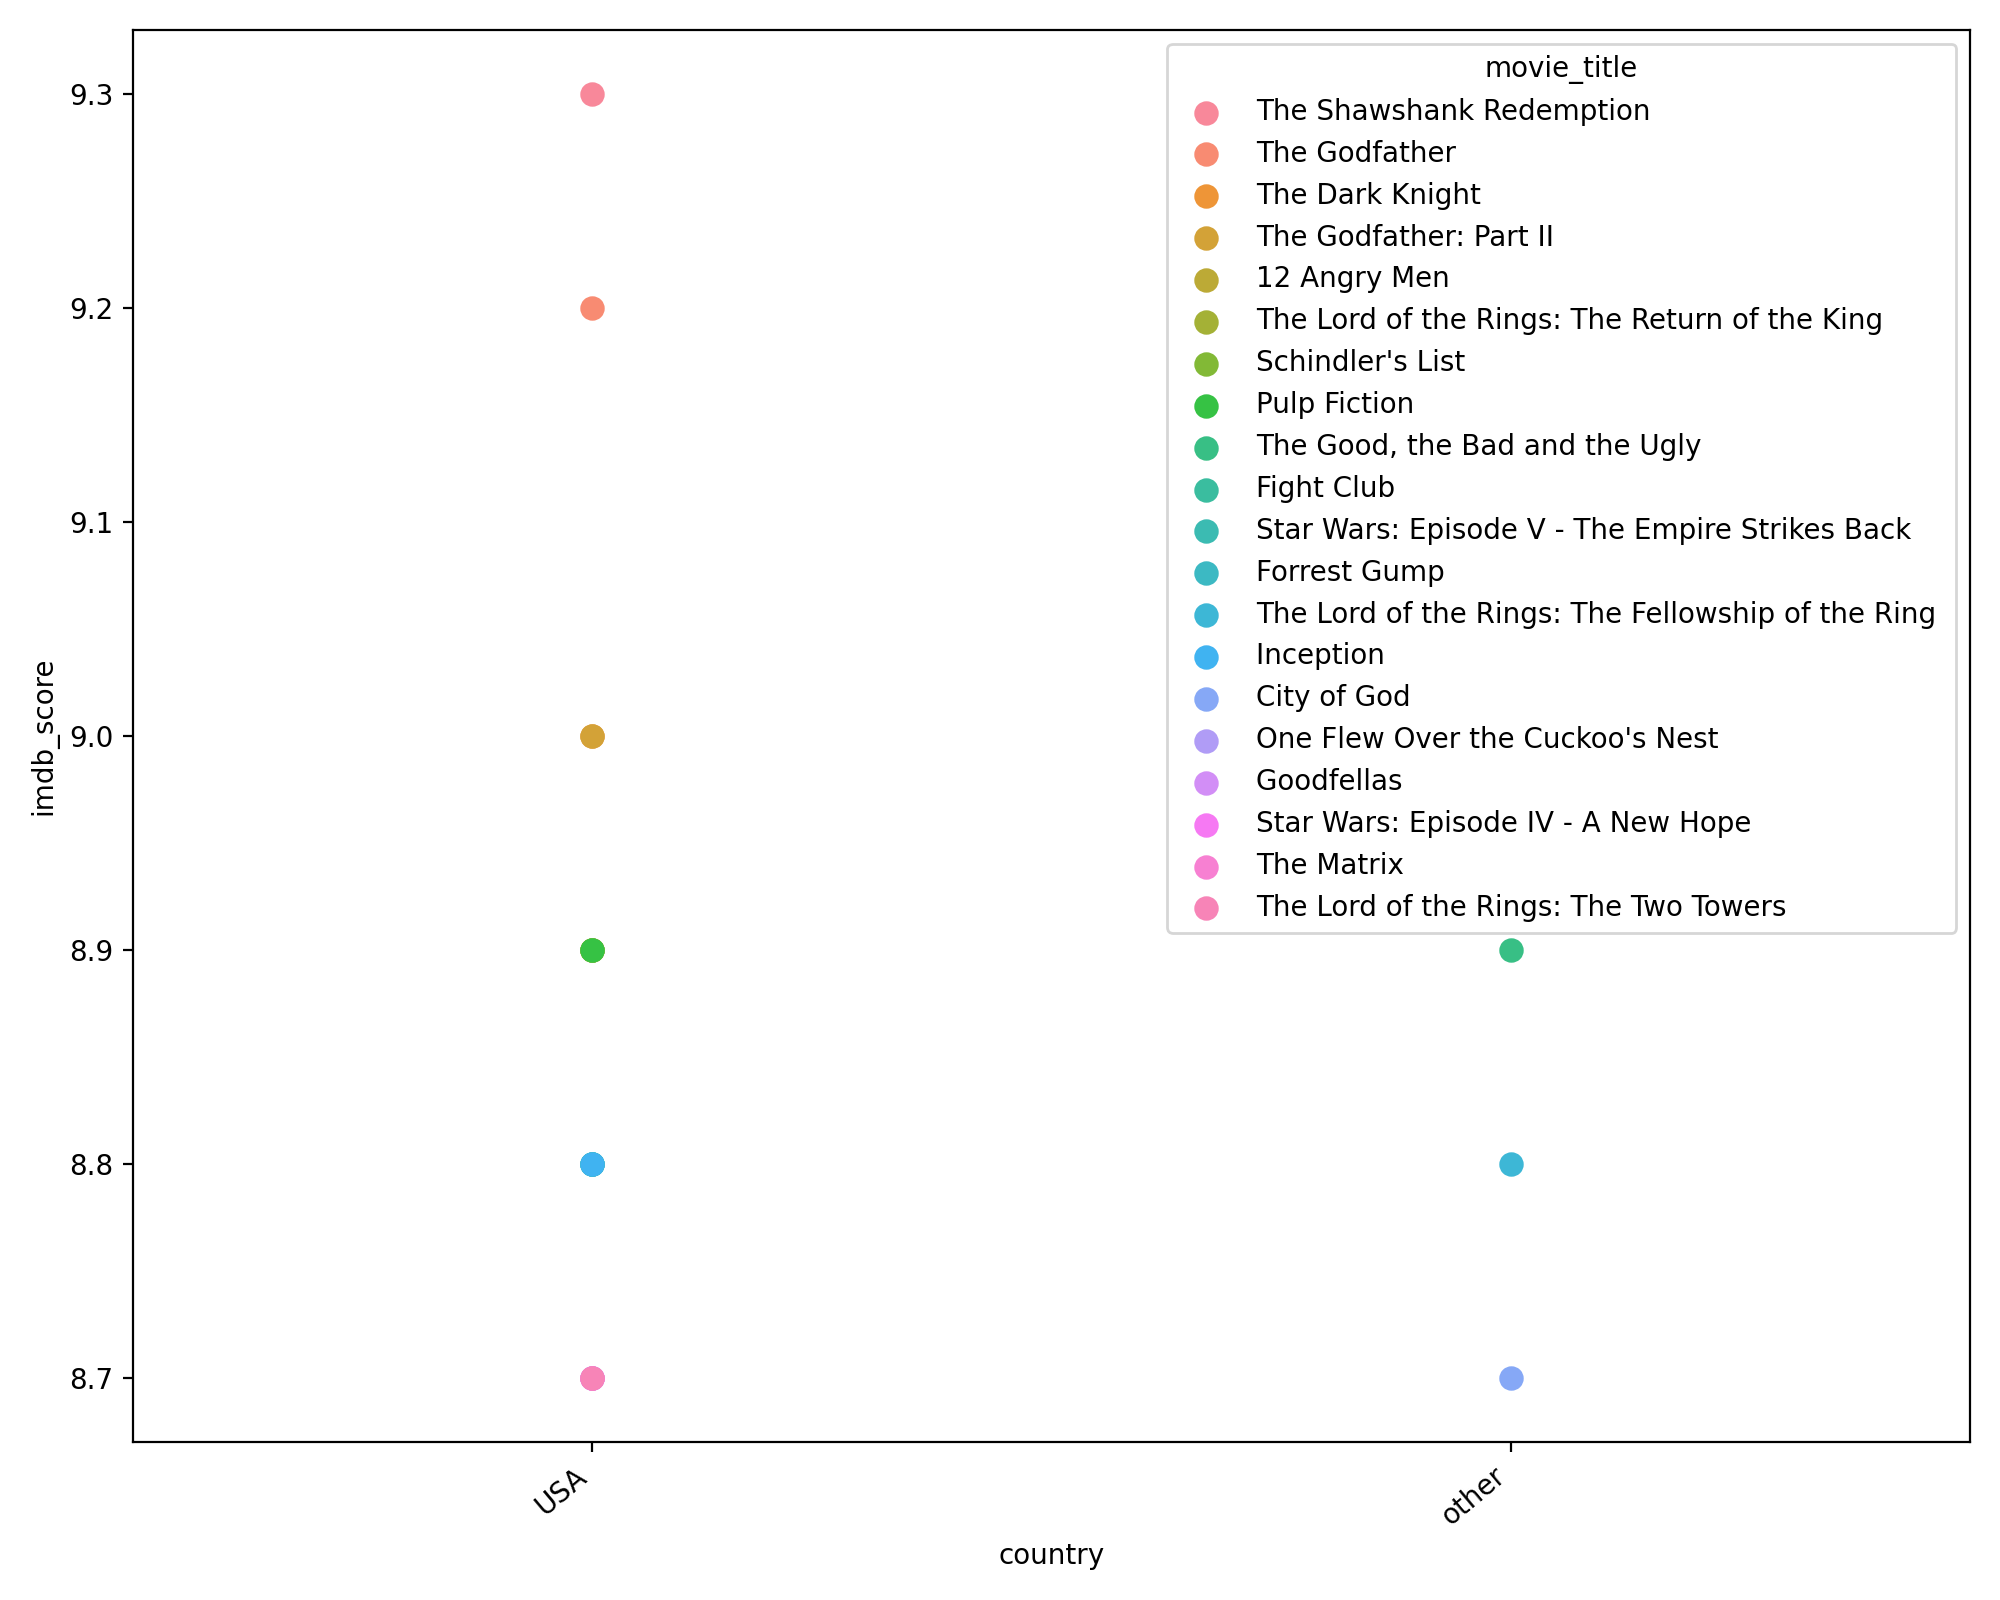

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by imdb_score in descending order
movie_df = movie_df.sort_values(by='imdb_score', ascending=False)

# Select the top 20 movies
top_20_movies = movie_df.head(20)

# Create a point plot
plt.figure(figsize=(10, 8))
ax = sns.pointplot(x='country', y='imdb_score', data=top_20_movies, hue='movie_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
#Removing the director name column
movie_df.drop('director_name', axis=1, inplace=True)
#Removing the actor1 ,actor 2 and actor 3 names
movie_df.drop('actor_1_name',axis=1,inplace=True)
movie_df.drop('actor_2_name',axis=1,inplace=True)
movie_df.drop('actor_3_name',axis=1,inplace=True)
#Dropping the movie title
movie_df.drop('movie_title',axis=1,inplace=True)
# Dropping the plot keywords
movie_df.drop('plot_keywords',axis=1,inplace=True)
#Value count of genres
movie_df['genres'].value_counts()

Drama                                     209
Comedy                                    186
Comedy|Drama|Romance                      182
Comedy|Drama                              180
Comedy|Romance                            149
                                         ... 
Drama|Fantasy|Romance|Thriller              1
Comedy|Drama|Music|Musical|Romance          1
Biography|Crime|Drama|Mystery|Thriller      1
Adventure|Crime|Drama|Thriller              1
Action|Animation|Comedy|Family|Fantasy      1
Name: genres, Length: 875, dtype: int64

In [ ]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column
movie_df.drop('genres',axis=1,inplace =True)

<ipython-input-37-aeca09f7f3e3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


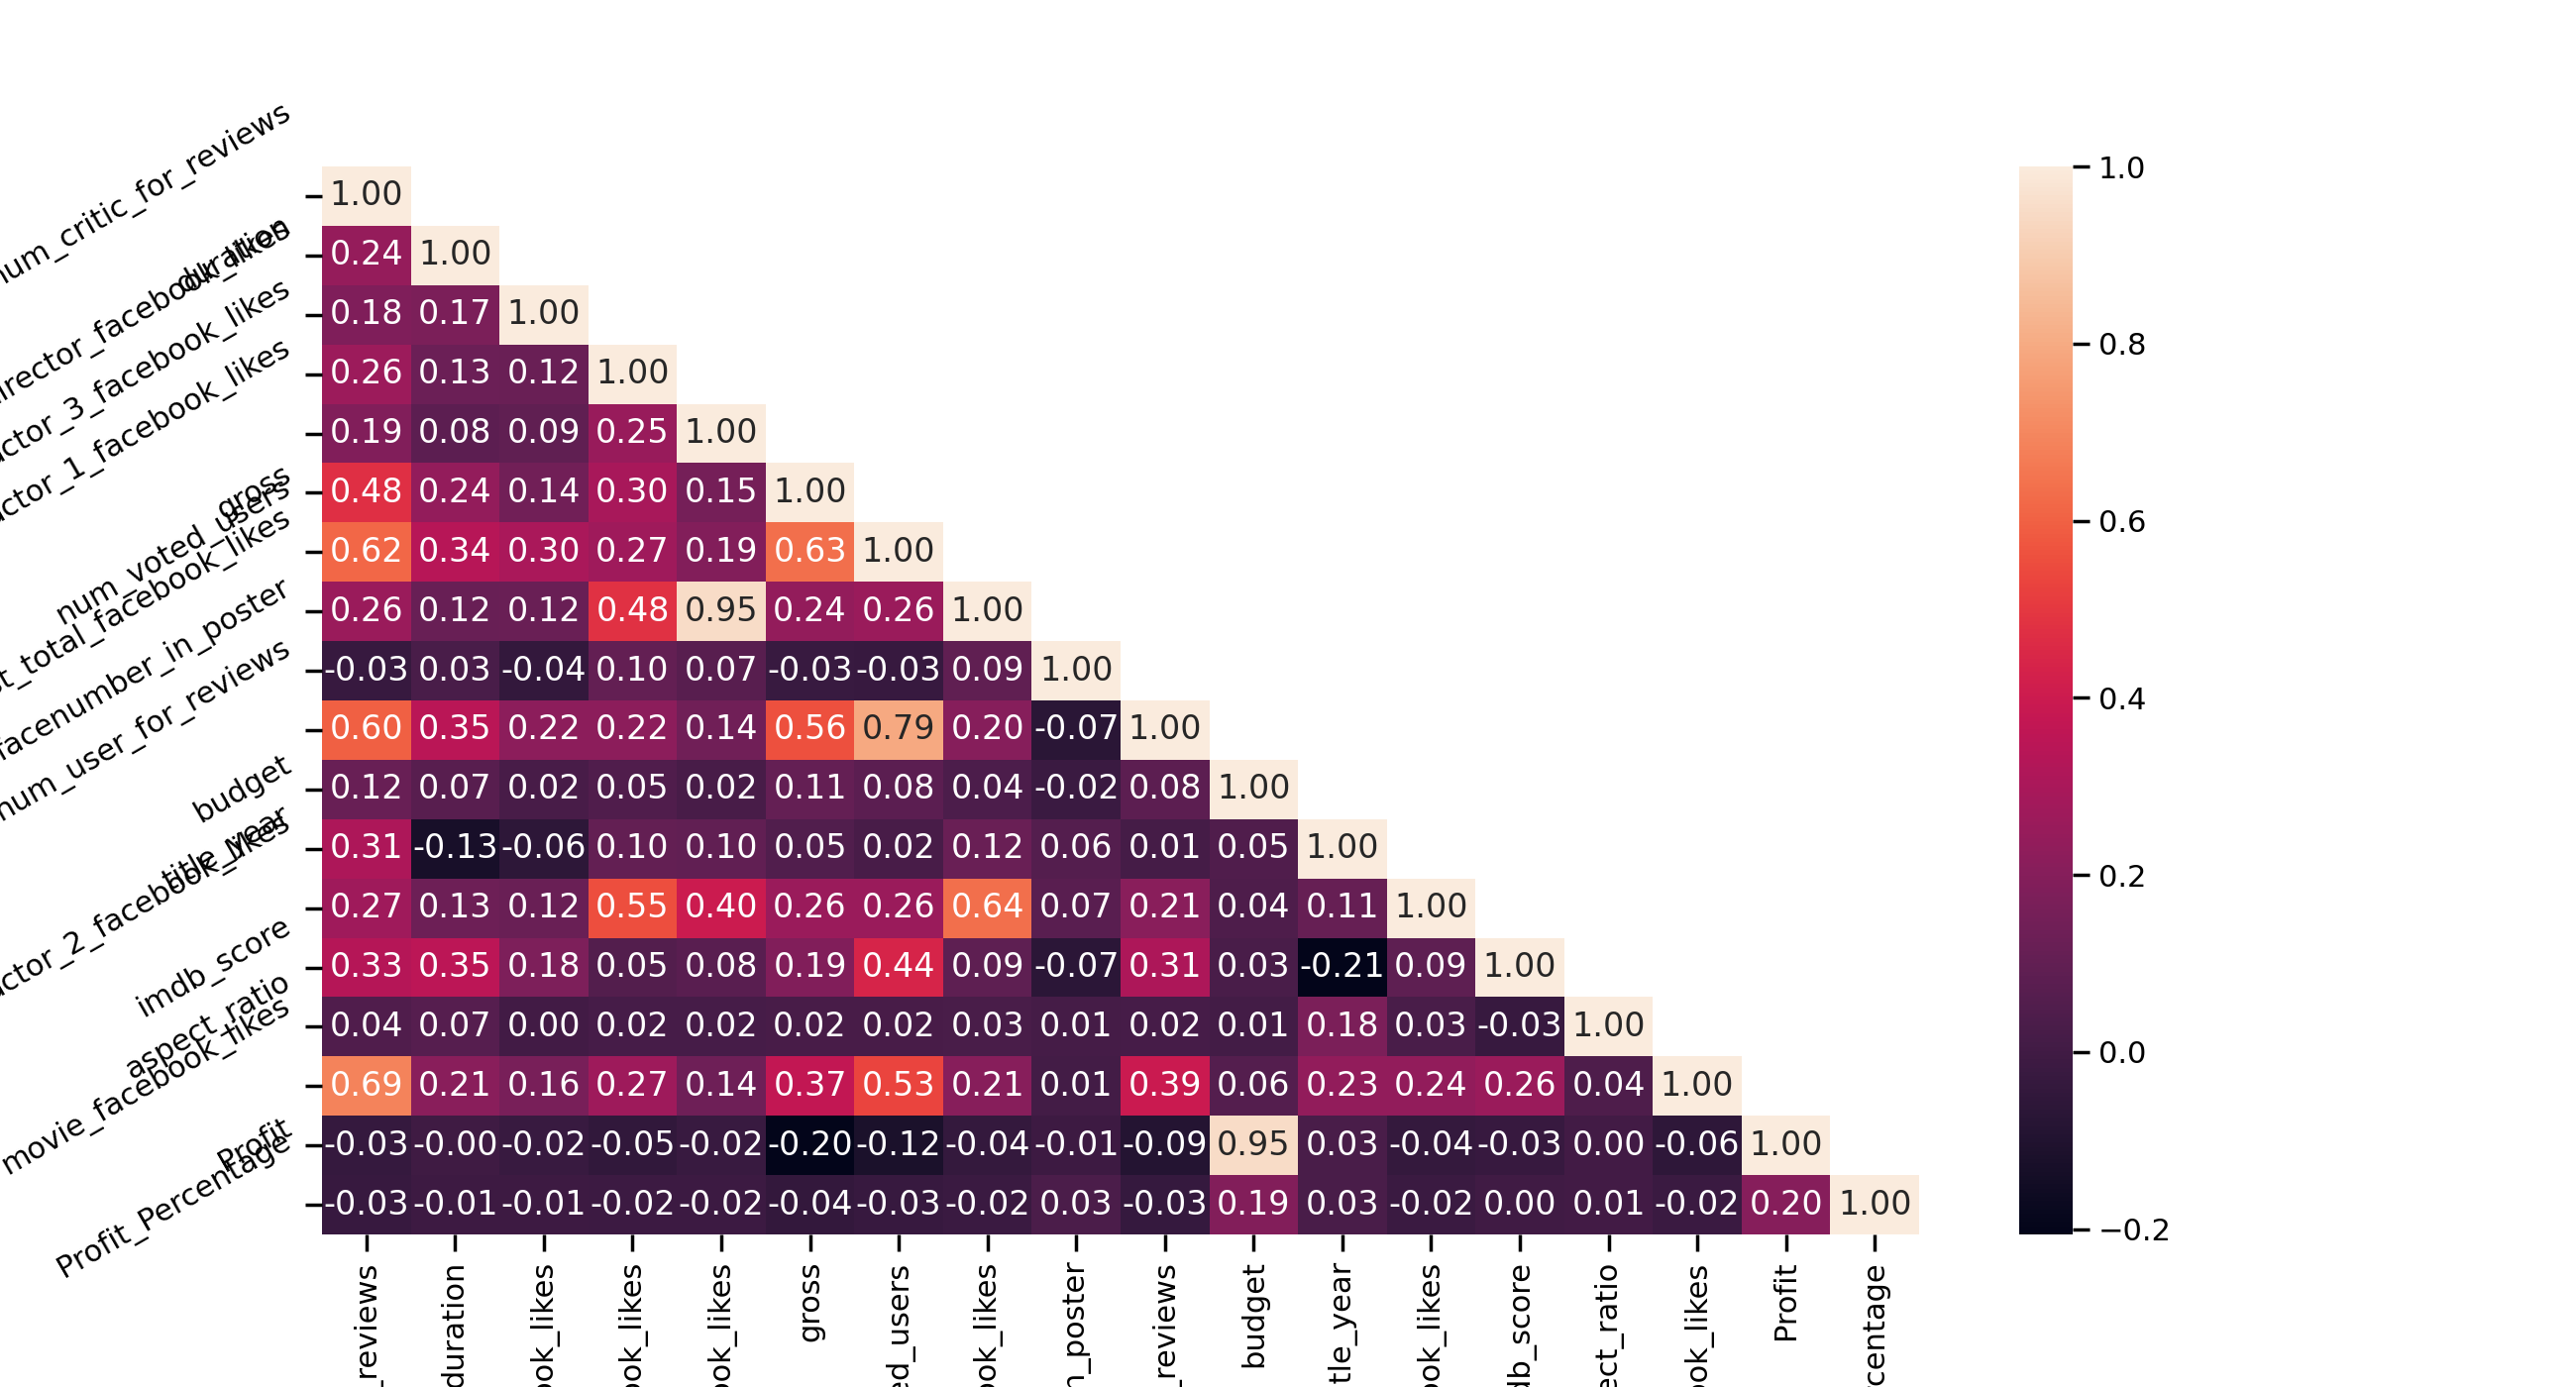

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### We can see that the cast_total_facebook_likes and actor_1_facebook_like are highly correlated to each other. Both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.There are high correlations among num_voted_users, num_user_for_reviews and num_critic_for_reviews. We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

<ipython-input-38-812449f1de81>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


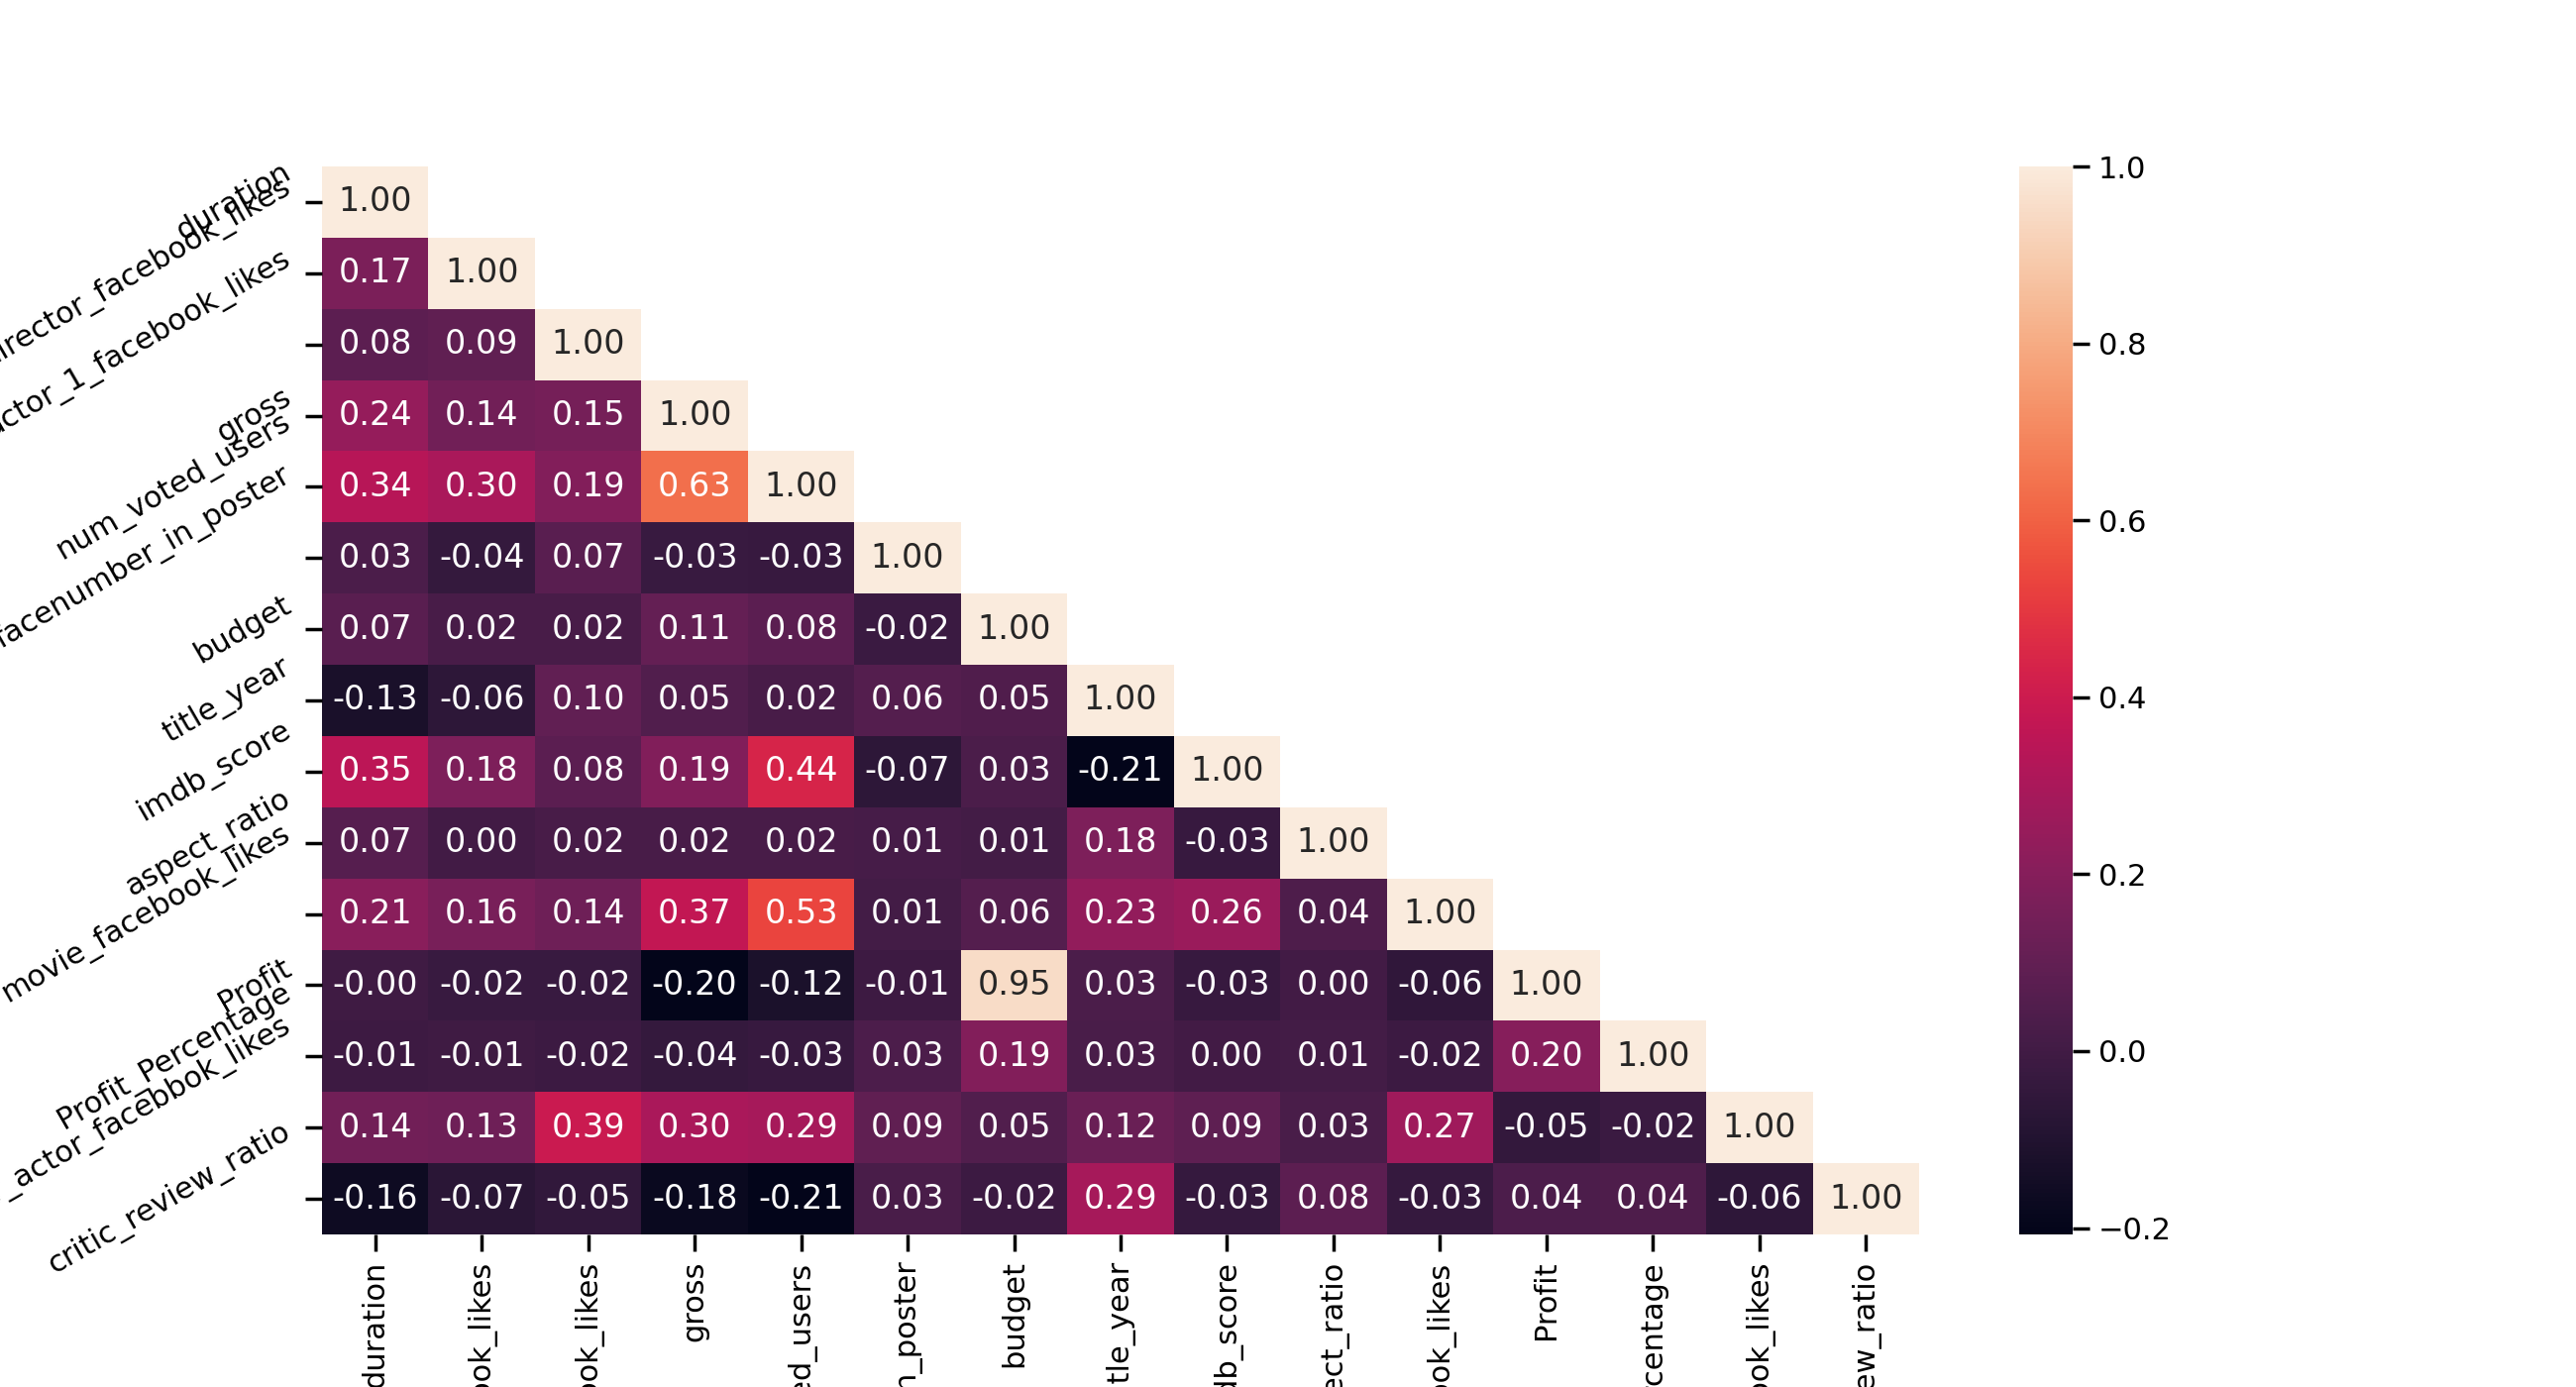

In [ ]:
#Adding the facebook likes of actor 2 and actor 3 together
movie_df['Other_actor_facebbok_likes']=movie_df["actor_2_facebook_likes"] + movie_df['actor_3_facebook_likes']
#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together

movie_df.drop('actor_2_facebook_likes',axis=1,inplace=True)
movie_df.drop('actor_3_facebook_likes',axis=1,inplace=True)
movie_df.drop('cast_total_facebook_likes',axis=1,inplace=True)
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

movie_df['critic_review_ratio']=movie_df['num_critic_for_reviews']/movie_df['num_user_for_reviews']
#Dropping the num_critic_for_review

movie_df.drop('num_critic_for_reviews',axis=1,inplace=True)
movie_df.drop('num_user_for_reviews',axis=1,inplace=True)
# New Correlation matrix shown in the figure

import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively
movie_df["imdb_binned_score"]=pd.cut(movie_df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1
#Dropping the imdb_score column as it is being replaced with the imdb_binned_score values
movie_df.drop('imdb_score',axis=1,inplace=True)
movie_df.head(5)

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,movie_imdb_link,country,content_rating,budget,title_year,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,Other_actor_facebbok_likes,critic_review_ratio,imdb_binned_score
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,USA,R,25000000.0,1994.0,1.85,108000,-3341469.0,-11.790035,1206.0,0.048021,4
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,http://www.imdb.com/title/tt0068646/?ref_=fn_t...,USA,R,6000000.0,1972.0,1.85,43000,-128821952.0,-95.549686,13000.0,0.092940,4
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,USA,PG-13,185000000.0,2008.0,2.35,37000,-348316061.0,-65.311377,24000.0,0.138204,4
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,http://www.imdb.com/title/tt0071562/?ref_=fn_t...,USA,R,13000000.0,1974.0,1.85,14000,-44300000.0,-77.312391,17000.0,0.229231,4
4822,96.0,0.0,359.0,26005908.0,447785,1.0,http://www.imdb.com/title/tt0050083/?ref_=fn_t...,USA,Not Rated,350000.0,1957.0,1.66,40000,-25655908.0,-98.654152,512.0,0.199324,4


In [ ]:
#Handling the categorical data

movie_df = pd.get_dummies(data = movie_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
movie_df = pd.get_dummies(data = movie_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)
movie_df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'movie_imdb_link',
       'budget', 'title_year', 'aspect_ratio', 'movie_facebook_likes',
       'Profit', 'Profit_Percentage', 'Other_actor_facebbok_likes',
       'critic_review_ratio', 'imdb_binned_score', 'country_USA',
       'country_other', 'content_rating_G', 'content_rating_GP',
       'content_rating_M', 'content_rating_NC-17', 'content_rating_Not Rated',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_Passed',
       'content_rating_R', 'content_rating_TV-14', 'content_rating_TV-G',
       'content_rating_TV-PG', 'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [ ]:
#Splitting the data into training and test data

X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio','movie_facebook_likes','Other_actor_facebbok_likes','critic_review_ratio','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=movie_df)
y=pd.DataFrame(columns=['imdb_binned_score'],data=movie_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Random Forest


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  # Import the metrics module

rfc = RandomForestClassifier(n_estimators=200)  # You can specify other parameters like criterion here
rfc.fit(X_train, np.ravel(y_train, order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:", metrics.accuracy_score(y_test, rfcpred))


[[  0  27  19   0]
 [  1 178 199   0]
 [  0  72 850   2]
 [  0   1  34  26]]
Accuracy: 0.7480482611781405


# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

[[  2  30  14   0]
 [  6 206 166   0]
 [  2  93 825   4]
 [  0   2  27  32]]
Accuracy: 0.7558552164655784


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)


#Confusion matrix for logistic regression**

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))


#SVC
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))

#Naive bayes

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, gaussiannbpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, gaussiannbpred))

#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=60)
abcl=abcl.fit(X_train,np.ravel(y_train,order='C'))
abcl_pred=abcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[[  0  36  10   0]
 [  0 159 219   0]
 [  1  80 836   7]
 [  0   1  27  33]]
Accuracy: 0.7295954577714692
[[  0  26  20   0]
 [  0 170 208   0]
 [  0 149 775   0]
 [  0   1  47  13]]
Accuracy: 0.6799148332150461
[[  2  39   5   0]
 [  3 176 198   1]
 [  3 170 733  18]
 [  1  11  25  24]]
Accuracy: 0.6635911994322214
[[ 43   0   2   1]
 [317   0   3  58]
 [558   2   8 356]
 [  9   1   2  49]]
Accuracy: 0.07097232079488999
[[  7  22  16   1]
 [ 24 179 173   2]
 [ 20 184 697  23]
 [  0   4  23  34]]
Accuracy: 0.6508161816891412
[[  8  20  18   0]
 [ 18 188 169   3]
 [ 18 176 706  24]
 [  0   2  26  33]]
Accuracy: 0.6635911994322214


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


# Comparing all Models

In [ ]:
from sklearn.metrics import classification_report

print('Logistic  Reports\n',classification_report(y_test, y_pred))
print('KNN Reports\n',classification_report(y_test, knnpred))
print('SVC Reports\n',classification_report(y_test, svcpred))
print('Naive BayesReports\n',classification_report(y_test, gaussiannbpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Ada Boosting\n',classification_report(y_test, abcl_pred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))
print('Gradient Boosting',classification_report(y_test, test_pred))

Logistic  Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.58      0.42      0.49       378
           3       0.77      0.90      0.83       924
           4       0.82      0.54      0.65        61

    accuracy                           0.73      1409
   macro avg       0.54      0.47      0.49      1409
weighted avg       0.69      0.73      0.70      1409

KNN Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.49      0.45      0.47       378
           3       0.74      0.84      0.79       924
           4       1.00      0.21      0.35        61

    accuracy                           0.68      1409
   macro avg       0.56      0.38      0.40      1409
weighted avg       0.66      0.68      0.66      1409

SVC Reports
               precision    recall  f1-score   support

           1       0.22      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# Random Forest Algorithm accuracy = 74.5
# gradient boosting accuracy = 75.5

## The final accuracy is 75.5% using Gradient Boosting is considered to predict the Box Office Revenue Prediction.

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.7 MB/s eta 0:

In [ ]:
import gradio as gr

In [ ]:
import gradio as gr
import pandas as pd

# Load the movie data
movie_df = pd.read_csv('/content/drive/MyDrive/movie_metadata.csv')

# Define a dictionary with example movie titles and their corresponding revenues
example_revenues = {
    "Avatar": 70000,
    "Titanic": 64600,
    "Inception": 39234,
    "Tangled": 89747
}

# Define the Gradio app
def predict_revenue(movie_title):
    # Check if the movie title is in the example_revenues dictionary
    if movie_title in example_revenues:
        predicted_revenue = example_revenues[movie_title]
    else:
        # Get the movie data for the given title
        movie_data = movie_df.loc[movie_df['movie_title'] == movie_title]

        # Make a prediction of the revenue using a machine learning model
        # (This is where you would implement your own machine learning model to predict the revenue)
        predicted_revenue = 700000

    return f"${predicted_revenue:,.2f}"  # Format revenue as dollars

# Define custom CSS to set the entire interface background color to pink
custom_css = """
body {
    background-color: #ffcccb;  /* Set the background color to a light pink */
}
"""

# Create the Gradio app with the custom CSS for the entire interface
app = gr.Interface(
    fn=predict_revenue,
    inputs="text",
    outputs="text",
    title="Movie Revenue Predictor",
    description="Enter a movie title and click the 'Predict' button to estimate its revenue.",
    layout="vertical",
    live_button=True,
    examples=[["Avatar"], ["Titanic"], ["Inception"], ["Tangled"]],
    css=custom_css,  # Apply the custom CSS for the entire interface
)

# Launch the Gradio app
app.launch()


<ipython-input-54-46aba8307456>:38: GradioDeprecationWarning: `layout` parameter is deprecated, and it has no effect
<ipython-input-54-46aba8307456>:38: GradioUnusedKwargWarning: You have unused kwarg parameters in Interface, please remove them: {'live_button': True}


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ad644ba13aaeebfc07.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
